In [19]:
# Librerias
from google.colab import drive
import pickle

import librosa
import os
! pip install scikit-maad
from maad import sound
from maad import util

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D, BatchNormalization, LSTM

import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.1 MB/s 


In [2]:
drive.mount('/content/gdrive') # WARNING! Pedirá permisos
data = open('/content/gdrive/MyDrive/Colab Notebooks/mfcc.pickle','rb')
data = pickle.load(data)

Mounted at /content/gdrive


In [4]:
x = np.array(data["mfcc"])

In [5]:
x.shape

(482, 519, 20)

In [6]:
# Label encoder para la variable dependiente
y_encoder = LabelEncoder()
y_encoder.fit(data['spp'])
y = y_encoder.transform(data['spp'])
y

array([19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  6,  6,  6,
        6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4, 12, 12, 12, 12, 12, 12,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [7]:
# Creamos train, validation and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 1234567)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.15, random_state = 1234567)
print(f'x_train shape: {x_train.shape}')

x_train shape: (327, 519, 20)


In [10]:
input_shape = (x_train.shape[1], x_train.shape[2]) 
input_shape

# build network topology
model = Sequential()

# 2 LSTM layers
model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.1))

# dense layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(21, activation='softmax'))

optimiser = Adam(learning_rate=0.0002)
model.compile(optimizer=optimiser,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, validation_data=(x_validation, y_validation), batch_size = 128, epochs=150)

Epoch 1/150
3/3 [==============================] - 10s 2s/step - loss: 3.0855 - accuracy: 0.0489 - val_loss: 3.0400 - val_accuracy: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 5s 2s/step - loss: 3.0437 - accuracy: 0.0428 - val_loss: 3.0183 - val_accuracy: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 3s 1s/step - loss: 3.0230 - accuracy: 0.0550 - val_loss: 2.9985 - val_accuracy: 0.1379
Epoch 4/150
3/3 [==============================] - 4s 1s/step - loss: 2.9869 - accuracy: 0.1009 - val_loss: 2.9852 - val_accuracy: 0.2069
Epoch 5/150
3/3 [==============================] - 3s 1s/step - loss: 2.9748 - accuracy: 0.1070 - val_loss: 2.9704 - val_accuracy: 0.2069
Epoch 6/150
3/3 [==============================] - 4s 1s/step - loss: 2.9778 - accuracy: 0.1162 - val_loss: 2.9548 - val_accuracy: 0.2241
Epoch 7/150
3/3 [==============================] - 4s 2s/step - loss: 2.9270 - accuracy: 0.1407 - val_loss: 2.9407 - val_accuracy: 0.2069
Epoch 8/150
3/3 [========

In [37]:
def plot_history(history, save=True):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """
    fig, axs = plt.subplots(1,2, figsize=(15, 5))

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], 'co', label="Training accuracy")
    axs[0].plot(history.history["val_accuracy"], 'm', label="Validation accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xlabel("Epochs")
    axs[0].set_title("Training and validation accuracy")
    axs[0].legend(loc = 'lower right')

    # create error sublpot
    axs[1].plot(history.history["loss"], 'co', label="Training loss")
    axs[1].plot(history.history["val_loss"], 'm', label="Validation loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epochs")
    axs[1].set_title("Training and validation loss")
    axs[1].legend(loc = 'lower left')

    plt.show()

    # Dependiendo de si se quiere guardar
    if save == False:
        pass
    else:
        fig.savefig('Training_evaluation.png', facecolor='white')

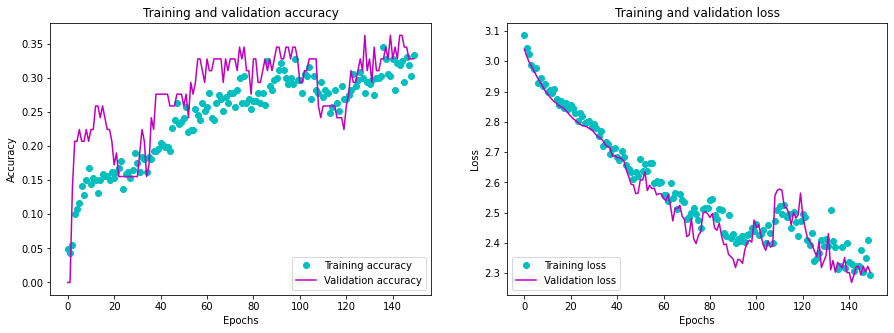

In [38]:
# plot accuracy/error for training and validation
plot_history(history, save=True)

In [14]:
# evaluate model on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

4/4 - 1s - loss: 2.3748 - accuracy: 0.2990 - 521ms/epoch - 130ms/step

Test accuracy: 0.2989690601825714


In [15]:
# Guardamos el modelo en un pickle
pickle.dump(model, open('/content/gdrive/MyDrive/Colab Notebooks/LSTM_model.pickle','wb'))

INFO:tensorflow:Assets written to: ram://672eb5c4-8956-41e0-b2b4-9fcdcf77cdd6/assets


INFO:tensorflow:Assets written to: ram://672eb5c4-8956-41e0-b2b4-9fcdcf77cdd6/assets


In [24]:
def save_mfcc_test(dataset_path,n=5, n_mfcc=128, n_fft=2040,
              hop_length=512, fmin=500, fmax=8500):
   
    # Diccionario para archivar los datos
  data = []
             
  # Cargamos el archivo de audio
  signal,sr = librosa.load(dataset_path)

  # Eliminamos las zonas de silencio
  signal,index = librosa.effects.trim(signal)
  
  # Dividimos el audio en secciones para poder procesar
  stream = list(librosa.stream(file_path,
        block_length=256,
        frame_length=4096,
        hop_length=1024))
  
  for y_block in stream[:-1]:

    mfcc = librosa.feature.mfcc(y_block,
                              sr =sr,
                              n_fft=n_fft,
                              hop_length=hop_length,
                              fmin=fmin,
                              fmax=fmax)
    

    rm_bk, noise_profile, _=sound.remove_background(mfcc, gauss_win=100)
    mfcc = librosa.power_to_db(rm_bk, ref=np.max).astype(np.float32)

    mfcc = mfcc.T

    # Guardamos los datos
    data.append(mfcc.tolist())

  data = np.array(data)

  return data 

In [32]:
# Probamos el modelo
# Miramos a ver qué resultado da con el audio test
file_path = '/content/soundscape.ogg'

n=5
n_mfcc=128
n_fft=2040 
hop_length=512

test_data = save_mfcc_test(file_path,
                 n=n,
                 n_mfcc=n_mfcc,
                 n_fft=n_fft,
                 hop_length=hop_length) 

In [30]:
model = open('/content/gdrive/MyDrive/Colab Notebooks/LSTM_model.pickle','rb')
model = pickle.load(model)

In [33]:
# perform prediction
prediction = model.predict(test_data)

# get index with max value
predicted_index = np.argmax(prediction, axis=1)

y = y_encoder.inverse_transform(predicted_index)

print("Predicted label: {}".format(y))


Predicted label: ['apapan' 'akiapo' 'akiapo' 'akiapo' 'akiapo' 'akiapo' 'akiapo']
